In [1]:
import cv2 as cv
import numpy as np
import serial
from matplotlib import pyplot as plt


In [2]:
cv.__version__

'4.5.4'

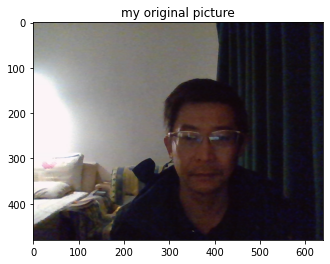

In [4]:
targetImg = cv.imread('1.png')
targetRgbImg = cv.cvtColor(targetImg,cv.COLOR_BGR2RGB)
# name1 = 'pic 1'
# name2 = 'gray pic 1'
# cv.namedWindow(name1,cv.WINDOW_NORMAL)
# cv.namedWindow(name2,cv.WINDOW_NORMAL)
# cv.imshow(name1,targetImg)

# cv.moveWindow(name2,targetImg.shape[0]+ 10, 10)
plt.imshow(targetRgbImg)
plt.title('my original picture')
plt.show()


In [5]:
targetImg

array([[[148, 142, 148],
        [146, 140, 145],
        [144, 137, 143],
        ...,
        [ 13,  16,  27],
        [ 11,  13,  29],
        [ 10,  12,  27]],

       [[143, 141, 148],
        [142, 140, 147],
        [140, 138, 143],
        ...,
        [ 11,  15,  24],
        [ 11,  15,  25],
        [ 10,  13,  24]],

       [[143, 142, 146],
        [141, 139, 144],
        [141, 139, 144],
        ...,
        [ 14,  15,  19],
        [ 12,  15,  21],
        [ 12,  15,  21]],

       ...,

       [[ 41,  35,  40],
        [ 42,  36,  42],
        [ 44,  37,  43],
        ...,
        [ 42,  15,  20],
        [ 40,  14,  23],
        [ 39,  13,  22]],

       [[ 45,  35,  39],
        [ 45,  35,  39],
        [ 45,  34,  40],
        ...,
        [ 49,  16,  19],
        [ 43,  17,  21],
        [ 43,  17,  21]],

       [[ 49,  34,  39],
        [ 48,  33,  38],
        [ 46,  30,  37],
        ...,
        [ 56,  19,  20],
        [ 50,  19,  22],
        [ 50,  19,  22]]

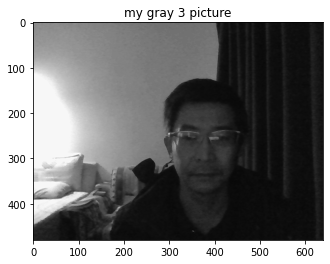

In [6]:
# display gray picture using plt
gray1 = cv.cvtColor(targetImg,cv.COLOR_BGR2GRAY)
#arr = np.asarray(gray1)

plt.imshow(gray1,cmap='gray',vmin=0,vmax=255)
plt.title('my gray 3 picture')
plt.show()

#cv.imshow(name2,gray1)
#cv.waitKey(1)
#cv.destroyWindow(name1)
#cv.destroyWindow(name2)

In [7]:
gray1

array([[144, 142, 140, ...,  19,  18,  16],
       [143, 142, 140, ...,  17,  18,  16],
       [143, 141, 141, ...,  16,  16,  16],
       ...,
       [ 37,  38,  40, ...,  20,  20,  19],
       [ 37,  37,  37, ...,  21,  21,  21],
       [ 37,  36,  34, ...,  24,  23,  23]], dtype=uint8)

In [8]:
gray1.shape

(480, 640)

In [13]:
ret,gray2=cv.threshold(gray1,0,255,cv.THRESH_BINARY | cv.THRESH_OTSU)
print('threshold=%d' %ret)                      

threshold=91


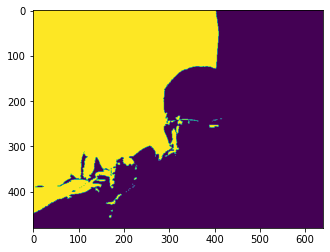

In [15]:
plt.imshow(gray2)

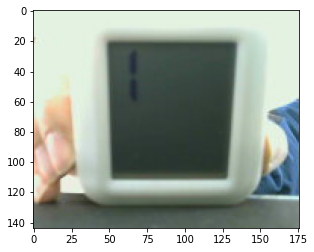

In [16]:
org1=cv.imread('./pictures/1.jpg')
org1_rgb = cv.cvtColor(org1,cv.COLOR_BGR2RGB)
plt.imshow(org1_rgb)

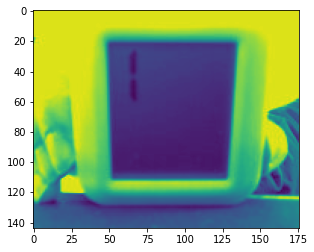

In [19]:
#threshold it
org_gray = cv.cvtColor(org1,cv.COLOR_BGR2GRAY)
plt.imshow(org_gray)

In [20]:
org_gray.shape

(144, 176)

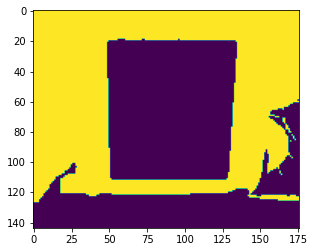

In [29]:
onedim = np.reshape(org_gray,-1)
m = int(onedim.mean())
ret,biImg = cv.threshold(org_gray,m,255,cv.THRESH_BINARY)
plt.imshow(biImg)


In [35]:
biImg.shape

(144, 176)

In [34]:
startMatching=False
matchCount,ignoreCount=0,0
ignoreNeeded = False 
left,right,top,bottom = 0,0,0,0
for i in range(biImg.shape[0]):   #row
    for j in range(biImg.shape[1]):  #column
        if biImg[i,j] == 0:  #in wanted block
            if startMatching:
                if ignoreNeeded == False:
                    matchCount +=1
                else:  #found the next row of interest
                    if abs(left-j)<=5: 
                        ignoredNeeded = False
                        print('found next row left at column %d' %j)
                        matchCount +=1
            else:
                if ignoreNeeded == False:
                    left=j
                    top=i
                    startMatching = True
                    matchCount+=1
                    print('found left/top corner %d,%d' %(i,j))
                else:
                    ignoreCount+=1
                    print('ignore a positive element at %d,%d' %(i,j))
        else: #   biImg[i,j]!=0   out of wanted block
            if startMatching:
                if ignoreNeeded ==False:
                    if right == 0:
                        right = j  #right border found
                        print('at row %d , found right column %d' %(i,j))
                        lastrow = i
                        
                    elif abs(right-j) < 5:
                        if (lastrow+1) == i:
                            print('at row %d,found next right column %d' %(i,j))
                        else:
                            print('breaked')
                    ignoreNeeded = True
                    ignoreCount+=1
                else:
                    if abs(j-left)<=5:
                        print('found bottom row at %d %d' %(i,j))
                        bottom = lastrow
                        break
                    ignoreCount+=1
            else:
                if ignoreNeeded:
                    ignoreCount+=1
                else:
                    ignoreCount+=1

print('left,top=(%d,%d),right,bottom = (%d,%d)' %(left,top,right,bottom))
            
                
        
                

found left/top corner 56,19
at row 19 , found right column 61
found next row left 51
found next row left 52
found next row left 53
found next row left 54
found next row left 55
found next row left 56
found next row left 57
found next row left 58
found next row left 59
found next row left 60
found next row left 61
found next row left 51
found next row left 52
found next row left 53
found next row left 54
found next row left 55
found next row left 56
found next row left 57
found next row left 58
found next row left 59
found next row left 60
found next row left 61
found next row left 51
found next row left 52
found next row left 53
found next row left 54
found next row left 55
found next row left 56
found next row left 57
found next row left 58
found next row left 59
found next row left 60
found next row left 61
found next row left 51
found next row left 52
found next row left 53
found next row left 54
found next row left 55
found next row left 56
found next row left 57
found next row lef

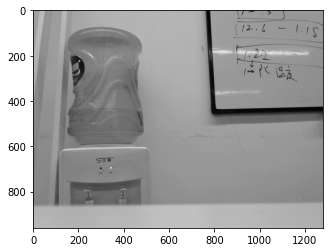

In [49]:
readgray1 = cv.imread('targetImghsv.png')
readgray1.shape
plt.imshow(readgray1)
plt.show()

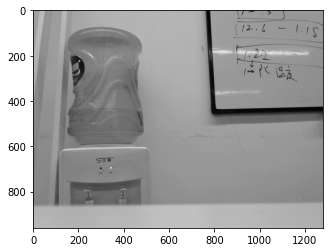

In [48]:
readgray1rgb = cv.cvtColor(readgray1,cv.COLOR_BGR2RGB)
plt.imshow(readgray1rgb)
plt.show()

In [46]:
cvgray1 = cv.imread('targetImghsv_cv.png')
cvgray1.shape

(960, 1280, 3)

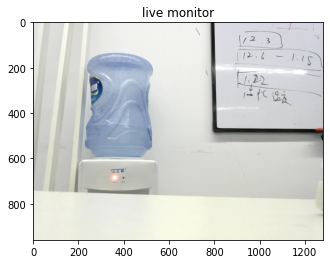

In [11]:
capture = cv.VideoCapture(0)
# monitorWindow = cv.namedWindow('Monitor Window')

hasEnteredFrame = False
i = 1
while i>0:
    hasEnteredFrame = capture.grab()
    if hasEnteredFrame:
        _, currentFrame = capture.retrieve()
        rgbFrame = cv.cvtColor(currentFrame,cv.COLOR_BGR2RGB)
        plt.imshow(rgbFrame)
        plt.title('live monitor')
        plt.show()
#         cv.imshow(monitorWindow,currentFrame)
        keyCode = cv.waitKey(1)
        keyCode &=0xFF
        if keyCode == ord('q'):
#             cv.destroyWindow(monitorWindow)
            break
        i-=1
            
        
        

In [33]:
rgbFrame.shape

(960, 1280, 3)

In [23]:
capture.release()
